## Computing norms by hand

$p$-norms can be computed in two different ways in numpy:

In [36]:
import numpy as np
import numpy.linalg as la

In [49]:
x = np.linspace(1, 100, 100, endpoint=True)

First, let's compute the 2-norm by hand:

In [50]:
#clear
np.sum(x**2)**(1/2)

581.6786054171153

Next, let's use `numpy` machinery to compute it:

In [51]:
#clear
la.norm(x, 2)

581.6786054171153

Both of the values above represent the 2-norm: $\|x\|_2$.

--------------

## About the $\infty$-norm

Different values of $p$ work similarly:

In [52]:
np.sum(np.abs(x)**5)**(1/5)

176.5868152619356

In [53]:
#clear
la.norm(x, 5)

176.5868152619356

---------------------

The $\infty$ norm represents a special case, because it's actually (in some sense) the *limit* of $p$-norms as $p\to\infty$.

Recall that: $\|x\|_\infty = \max(|x_1|, |x_2|, |x_3|)$.

Where does that come from? Let's try with $p=100$:

In [54]:
#clear
x**100

array([1.00000000e+000, 1.26765060e+030, 5.15377521e+047, 1.60693804e+060,
       7.88860905e+069, 6.53318624e+077, 3.23447651e+084, 2.03703598e+090,
       2.65613989e+095, 1.00000000e+100, 1.37806123e+104, 8.28179745e+107,
       2.47933511e+111, 4.10018609e+114, 4.06561178e+117, 2.58224988e+120,
       1.10889937e+123, 3.36705732e+125, 7.50516242e+127, 1.26765060e+130,
       1.66697648e+132, 1.74690015e+134, 1.48861915e+136, 1.04984255e+138,
       6.22301528e+139, 3.14293064e+141, 1.36891479e+143, 5.19760336e+144,
       1.73699989e+146, 5.15377521e+147, 1.36826237e+149, 3.27339061e+150,
       7.10221782e+151, 1.40569696e+153, 2.55155207e+154, 4.26825224e+155,
       6.60955783e+156, 9.51392365e+157, 1.27779358e+159, 1.60693804e+160,
       1.89839102e+161, 2.11314374e+162, 2.22251939e+163, 2.21445902e+164,
       2.09532492e+165, 1.88704896e+166, 1.62101037e+167, 1.33083354e+168,
       1.04618383e+169, 7.88860905e+169, 5.71501809e+170, 3.98413791e+171,
       2.67662149e+172, 1

In [55]:
#clear
np.sum(x**100)

1.572114066370549e+200

Compare to last value in vector: the addition has essentially taken the maximum:

In [56]:
#clear
np.sum(x**100)**(1/100)

100.45344622277295

Numpy can compute that, too:

In [57]:
#clear
la.norm(x, np.inf)

100.0

-------------

## Unit Balls

Once you know the set of vectors for which $\|x\|=1$, you know everything about the norm, because of semilinearity. The graphical version of this is called the 'unit ball'.

We'll make a bunch of vectors in 2D (for visualization) and then scale them so that $\|x\|=1$.

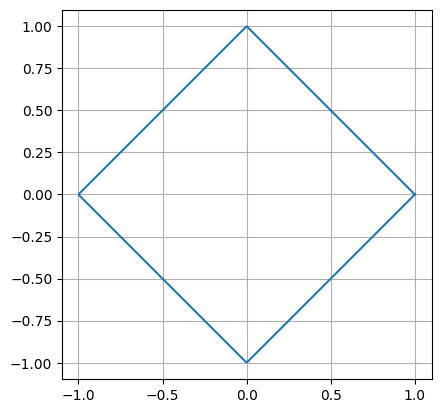

In [89]:
alpha = np.linspace(0, 2*np.pi, 1000, endpoint=True)
x = np.cos(alpha)
y = np.sin(alpha)

p = 1
norms = np.zeros(1000)

for i in range(1000):
    if p != np.inf:
        norms[i] = la.norm([x[i],y[i]],p)
    else:
        norms[i] = np.maximum(np.abs(x[i]), np.abs(y[i]))

x_unit = x/norms
y_unit = y/norms
#vecs = np.array([x,y])


#norms = np.sum(np.abs(vecs)**p, axis=0)**(1/p)
#norms = la.norm(vecs, p, axis = 0)
#norm_vecs = vecs/norms


import matplotlib.pyplot as pt
pt.grid()
pt.gca().set_aspect("equal")
#pt.plot(norm_vecs[0], norm_vecs[1])
pt.plot(x_unit, y_unit)
#pt.xlim([-1.5, 1.5])
#pt.ylim([-1.5, 1.5])